In [11]:
import qiskit
import qiskit_algorithms
from qiskit.circuit.library import ZFeatureMap, ZZFeatureMap, PauliFeatureMap

In [16]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
features = data.data  # Features
labels = data.target
print(features)
print(len(features[0]))

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
30


In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
features = pca.fit_transform(features)
print(features)
print(len(features[0]))

[[1160.1425737  -293.91754364]
 [1269.12244319   15.63018184]
 [ 995.79388896   39.15674324]
 ...
 [ 314.50175618   47.55352518]
 [1124.85811531   34.12922497]
 [-771.52762188  -88.64310636]]
2


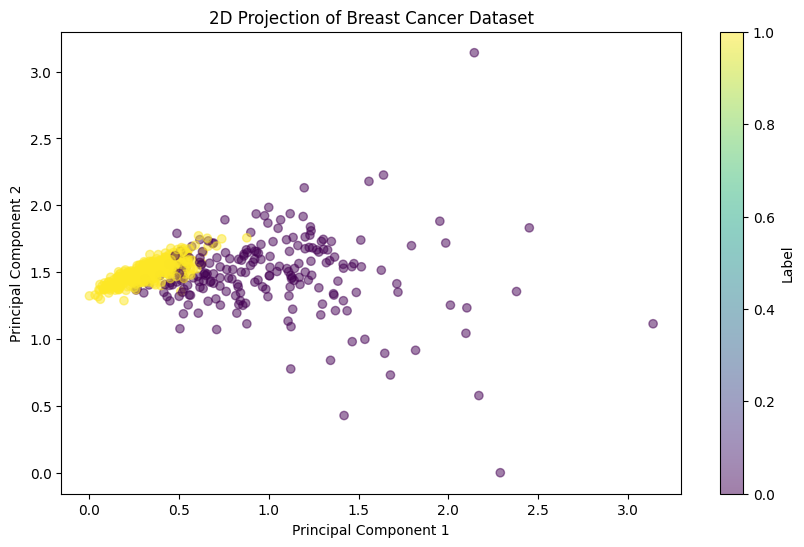

In [37]:
import matplotlib.pyplot as plt

x_coords = features[:, 0]
y_coords = features[:, 1]

# Create a scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(x_coords, y_coords, c=labels, cmap='viridis', alpha=0.5)

# Add a color bar to the plot
plt.colorbar(scatter, label='Label')

# Add labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D Projection of Breast Cancer Dataset')

# Display the plot
plt.show()

In [18]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

features = MinMaxScaler(feature_range=(0, np.pi)).fit_transform(features)

train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, train_size=0.7, shuffle=True
)

In [19]:
print(train_labels)
dims = len(features[0])
print(dims)

[1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 1 1 0
 1 0 0 1 0 1 1 0 1 0 0 0 1 1 1 0 1 0 0 0 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 0 1
 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 0 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0
 0 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 0 1 1
 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 0 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1
 1 0 0 1 1 1 0 0 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1
 1 1 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 1 0 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1 0 0
 1 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 1 0 0 1 0 0 1 0
 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0
 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1]
2


In [14]:
from qiskit_algorithms.state_fidelities import ComputeUncompute
from qiskit.primitives import Sampler

fidelity = ComputeUncompute(sampler=Sampler())

In [13]:
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from qiskit_machine_learning.algorithms import QSVC

In [9]:
Z_feature_map = ZFeatureMap(2)
Z_kernel = FidelityQuantumKernel(feature_map=Z_feature_map, fidelity=fidelity)

qsvc = QSVC(quantum_kernel=Z_kernel)
qsvc.fit(train_features, train_labels)
qsvc.score(test_features, test_labels)

0.9265033407572383

In [30]:
Z_feature_map = ZFeatureMap(3)
Z_kernel = FidelityQuantumKernel(feature_map=Z_feature_map, fidelity=fidelity)

qsvc = QSVC(quantum_kernel=Z_kernel)
qsvc.fit(train_features, train_labels)
qsvc.score(test_features, test_labels)

0.9122807017543859

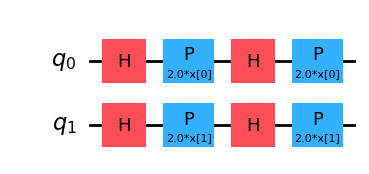

In [42]:
Z_feature_map.decompose().draw(output="mpl", fold=20)

In [14]:
# Create a mesh to plot in
x_min, x_max = train_features[:, 0].min() - 1, train_features[:, 0].max() + 1
y_min, y_max = train_features[:, 1].min() - 1, train_features[:, 1].max() + 1
print(x_min, x_max, y_min, y_max)
h = .1  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

-0.9686778253636449 3.2899334103283393 -1.0 4.141592653589793


In [15]:
# Predict each point on the mesh grid
Z = qsvc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

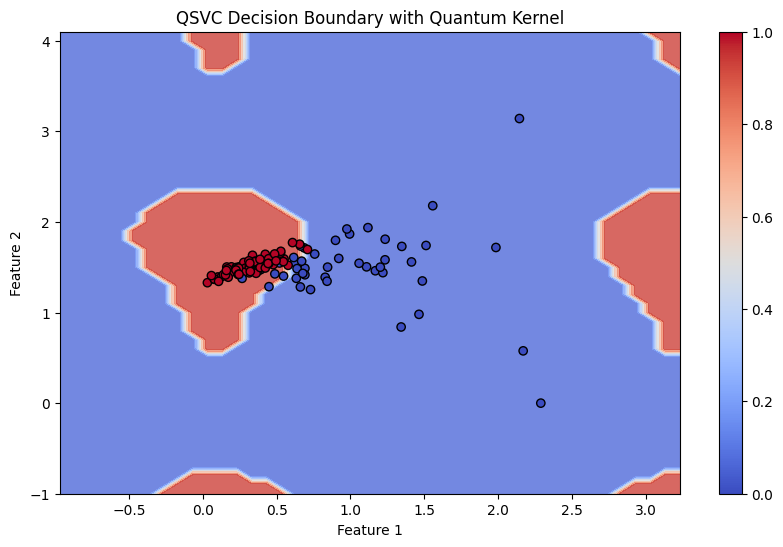

In [16]:
# Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot also the training points
scatter = plt.scatter(train_features[:, 0], train_features[:, 1], c=train_labels, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('QSVC Decision Boundary with Quantum Kernel')
plt.colorbar(scatter)
plt.show()

In [17]:
ZZ_feature_map = ZZFeatureMap(2)
ZZ_kernel = FidelityQuantumKernel(feature_map=ZZ_feature_map, fidelity=fidelity)

qsvc_ZZ = QSVC(quantum_kernel=ZZ_kernel)
qsvc_ZZ.fit(train_features, train_labels)
qsvc_ZZ.score(test_features, test_labels)

0.9242761692650334

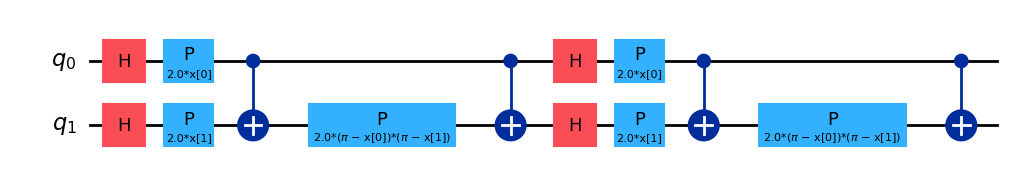

In [44]:
ZZ_feature_map = ZZFeatureMap(2)
ZZ_feature_map.decompose().draw(output="mpl", fold=20)

In [26]:
ZZ_feature_map = ZZFeatureMap(2)
print(ZZ_feature_map)
print(ZZ_feature_map.alpha)

     ┌──────────────────────────┐
q_0: ┤0                         ├
     │  ZZFeatureMap(x[0],x[1]) │
q_1: ┤1                         ├
     └──────────────────────────┘
2.0


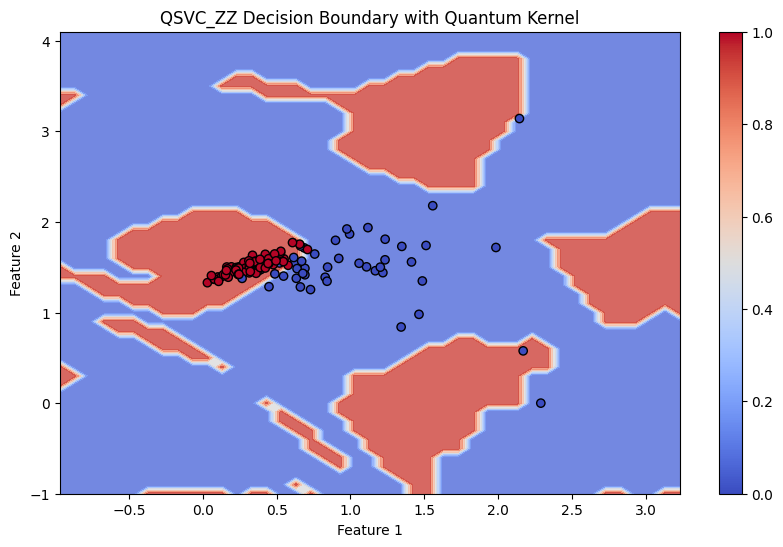

In [18]:
Z = qsvc_ZZ.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
# Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot also the training points
scatter = plt.scatter(train_features[:, 0], train_features[:, 1], c=train_labels, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('QSVC_ZZ Decision Boundary with Quantum Kernel')
plt.colorbar(scatter)
plt.show()

In [29]:
ZZ_feature_map = ZZFeatureMap(2, reps=4)
ZZ_kernel = FidelityQuantumKernel(feature_map=ZZ_feature_map, fidelity=fidelity)

qsvc_ZZ = QSVC(quantum_kernel=ZZ_kernel)
qsvc_ZZ.fit(train_features, train_labels)
qsvc_ZZ.score(test_features, test_labels)

0.8797327394209354

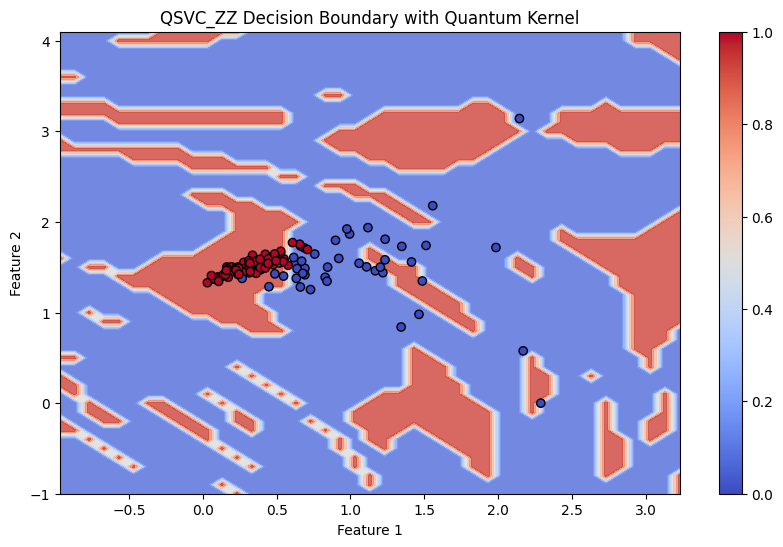

In [30]:
Z = qsvc_ZZ.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
# Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot also the training points
scatter = plt.scatter(train_features[:, 0], train_features[:, 1], c=train_labels, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('QSVC_ZZ Decision Boundary with Quantum Kernel')
plt.colorbar(scatter)
plt.show()

In [20]:
Pauli_feature_map_Y = PauliFeatureMap(2, paulis = ['Y'])
Pauli_kernel_Y = FidelityQuantumKernel(feature_map=Pauli_feature_map_Y, fidelity=fidelity)

qsvc_Pauli_Y = QSVC(quantum_kernel=Pauli_kernel_Y)
qsvc_Pauli_Y.fit(train_features, train_labels)
qsvc_Pauli_Y.score(test_features, test_labels)

0.5847953216374269

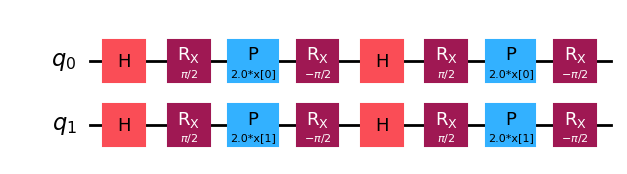

In [21]:
Pauli_feature_map_Y.decompose().draw(output="mpl", fold=-1)

In [22]:
Pauli_feature_map_Y_YY = PauliFeatureMap(2, paulis = ['Y', 'YY'])
Pauli_kernel_Y_YY = FidelityQuantumKernel(feature_map=Pauli_feature_map_Y_YY, fidelity=fidelity)

qsvc_Pauli_Y_YY = QSVC(quantum_kernel=Pauli_kernel_Y_YY)
qsvc_Pauli_Y_YY.fit(train_features, train_labels)
qsvc_Pauli_Y_YY.score(test_features, test_labels)

0.5847953216374269

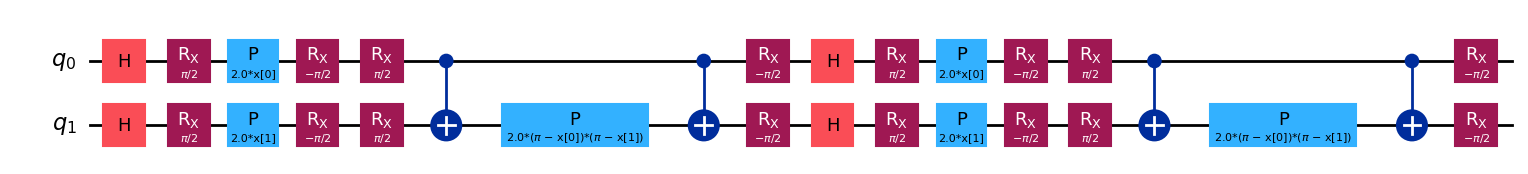

In [23]:
Pauli_feature_map_Y_YY.decompose().draw(output="mpl", fold=-1)

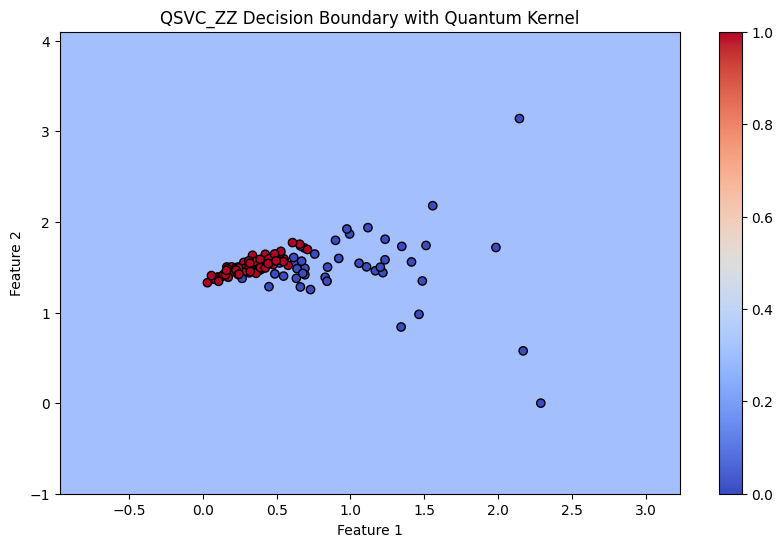

In [32]:
Z = qsvc_Pauli_Y.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
# Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot also the training points
scatter = plt.scatter(train_features[:, 0], train_features[:, 1], c=train_labels, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('QSVC_ZZ Decision Boundary with Quantum Kernel')
plt.colorbar(scatter)
plt.show()

In [33]:
Pauli_feature_map = PauliFeatureMap(2, paulis = ['Z','X','ZY'])
Pauli_kernel = FidelityQuantumKernel(feature_map=Pauli_feature_map, fidelity=fidelity)

qsvc_Pauli_Z_X_ZY = QSVC(quantum_kernel=Pauli_kernel)
qsvc_Pauli_Z_X_ZY.fit(train_features, train_labels)
qsvc_Pauli_Z_X_ZY.score(test_features, test_labels)

0.8819599109131403

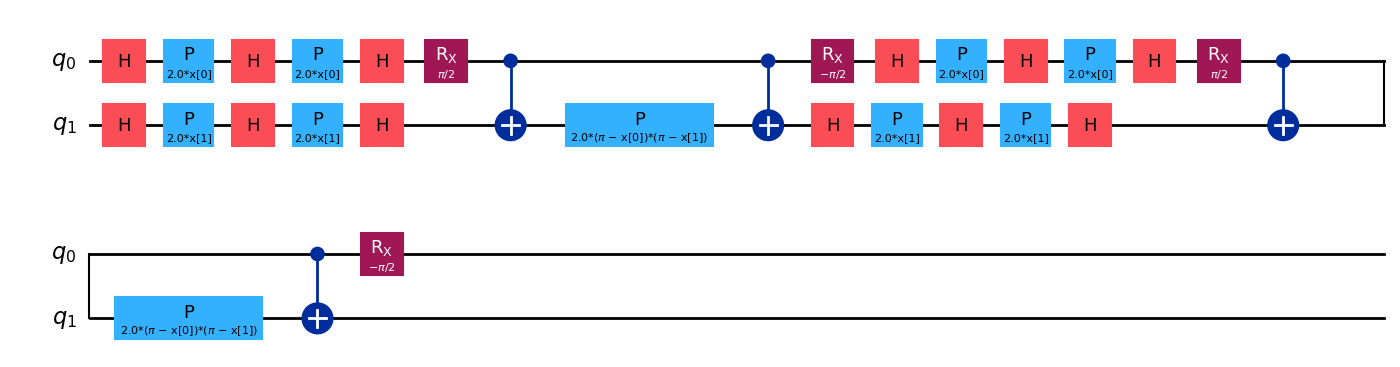

In [45]:
Pauli_feature_map = PauliFeatureMap(2, paulis = ['Z','X','ZY'])
Pauli_feature_map.decompose().draw(output="mpl", fold=20)

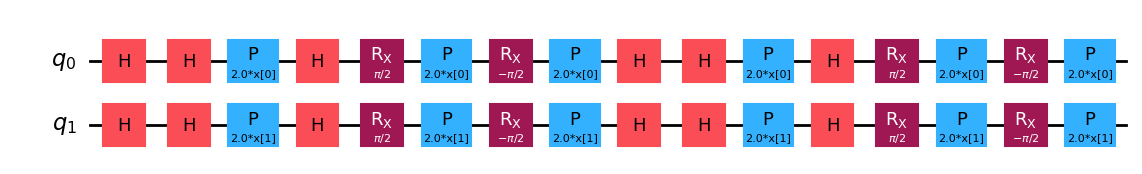

In [68]:
Pauli_feature_map = PauliFeatureMap(2, paulis = ['X', 'Y', 'Z'])
Pauli_kernel = FidelityQuantumKernel(feature_map=Pauli_feature_map, fidelity=fidelity)
Pauli_feature_map.decompose().draw(output="mpl", fold=-1)

In [69]:
qsvc_Pauli_X_Y_Z = QSVC(quantum_kernel=Pauli_kernel)
qsvc_Pauli_X_Y_Z.fit(train_features, train_labels)
qsvc_Pauli_X_Y_Z.score(test_features, test_labels)

0.8713450292397661

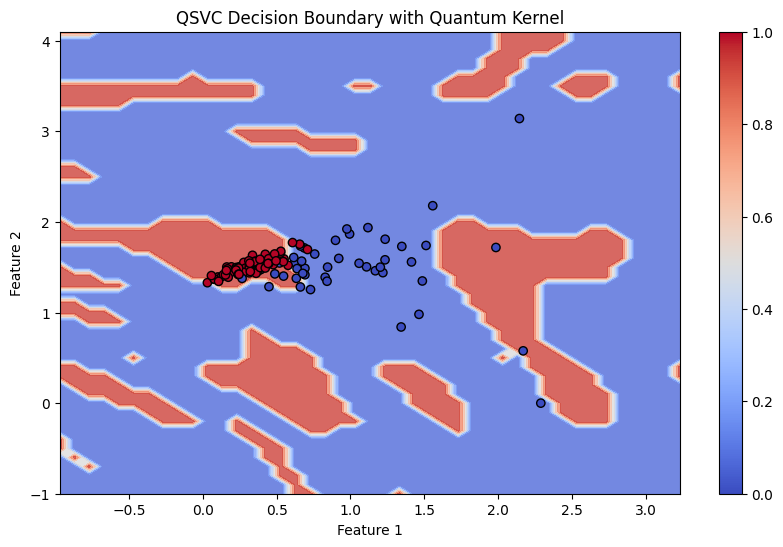

In [34]:
Z = qsvc_Pauli_Z_X_ZY.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
# Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot also the training points
scatter = plt.scatter(train_features[:, 0], train_features[:, 1], c=train_labels, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('QSVC Decision Boundary with Quantum Kernel')
plt.colorbar(scatter)
plt.show()

In [35]:
Pauli_feature_map_YY = PauliFeatureMap(2, paulis = ['YY'])
Pauli_kernel_YY = FidelityQuantumKernel(feature_map=Pauli_feature_map_YY, fidelity=fidelity)

qsvc_Pauli_YY = QSVC(quantum_kernel=Pauli_kernel_YY)
qsvc_Pauli_YY.fit(train_features, train_labels)
qsvc_Pauli_YY.score(test_features, test_labels)

0.6302895322939867

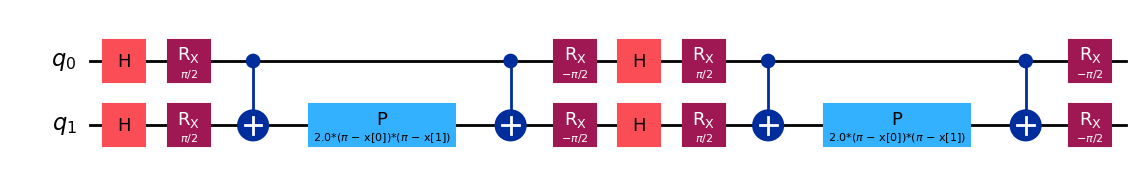

In [28]:
Pauli_feature_map_YY = PauliFeatureMap(2, paulis = ['YY'])
Pauli_feature_map_YY.decompose().draw(output="mpl", fold=-1)

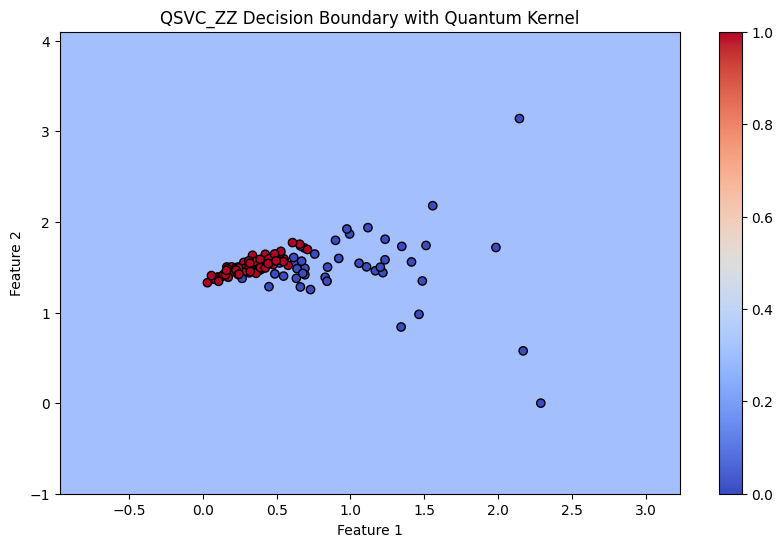

In [36]:
Z = qsvc_Pauli_Y.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
# Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot also the training points
scatter = plt.scatter(train_features[:, 0], train_features[:, 1], c=train_labels, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('QSVC_ZZ Decision Boundary with Quantum Kernel')
plt.colorbar(scatter)
plt.show()

In [29]:
Pauli_feature_map_ZZ = PauliFeatureMap(2, paulis = ['ZZ'])
Pauli_kernel_ZZ = FidelityQuantumKernel(feature_map=Pauli_feature_map_ZZ, fidelity=fidelity)

qsvc_Pauli_ZZ = QSVC(quantum_kernel=Pauli_kernel_ZZ)
qsvc_Pauli_ZZ.fit(train_features, train_labels)
qsvc_Pauli_ZZ.score(test_features, test_labels)

0.8017817371937639

In [30]:
Pauli_feature_map_Z_ZZ = PauliFeatureMap(2, reps=3, paulis = ['Z', 'ZZ'])
Pauli_kernel_Z_ZZ = FidelityQuantumKernel(feature_map=Pauli_feature_map_Z_ZZ, fidelity=fidelity)

qsvc_Pauli_Z_ZZ = QSVC(quantum_kernel=Pauli_kernel_Z_ZZ)
qsvc_Pauli_Z_ZZ.fit(train_features, train_labels)
qsvc_Pauli_Z_ZZ.score(test_features, test_labels)

0.8864142538975501

In [26]:
Pauli_feature_map_Z_ZZ = PauliFeatureMap(2, reps=3, paulis = ['Z', 'ZZ'])
Pauli_feature_map_Z_ZZ_feature_map = ZZFeatureMap(2)
print(Pauli_feature_map_Z_ZZ)
print(Pauli_feature_map_Z_ZZ.alpha)

     ┌─────────────────────────────┐
q_0: ┤0                            ├
     │  PauliFeatureMap(x[0],x[1]) │
q_1: ┤1                            ├
     └─────────────────────────────┘
2.0


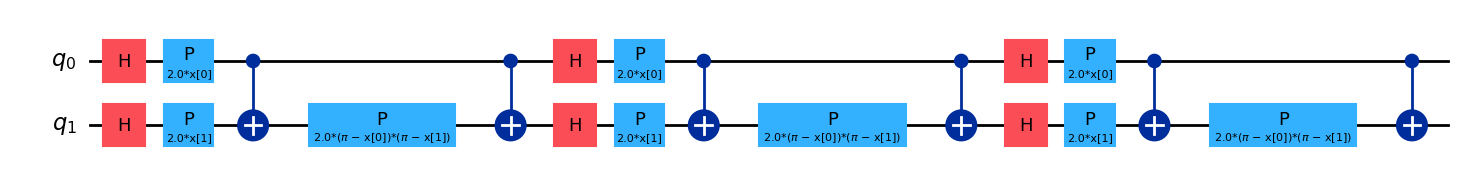

In [27]:
Pauli_feature_map_Z_ZZ.decompose().draw(output="mpl", fold=-1)

In [24]:
Pauli_feature_map_Z_X = PauliFeatureMap(2, reps=2, paulis = ['Z', 'X'])
Pauli_kernel_Z_X = FidelityQuantumKernel(feature_map=Pauli_feature_map_Z_X, fidelity=fidelity)

qsvc_Pauli_Z_X = QSVC(quantum_kernel=Pauli_kernel_Z_X)
qsvc_Pauli_Z_X.fit(train_features, train_labels)
qsvc_Pauli_Z_X.score(test_features, test_labels)

0.8713450292397661

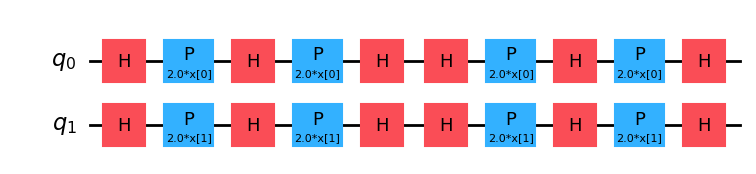

In [25]:
Pauli_feature_map_Z_X.decompose().draw(output="mpl", fold=-1)